  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=471caa4f12f94af897644bed6ef58f3ff2c8d89a5e63bf26f2153d0435e254fc
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Overall accuracy: 0.69


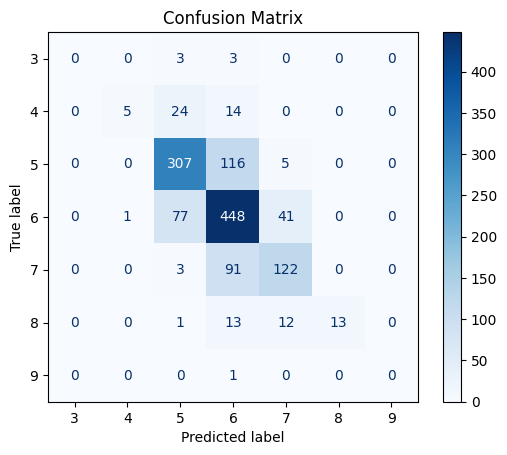

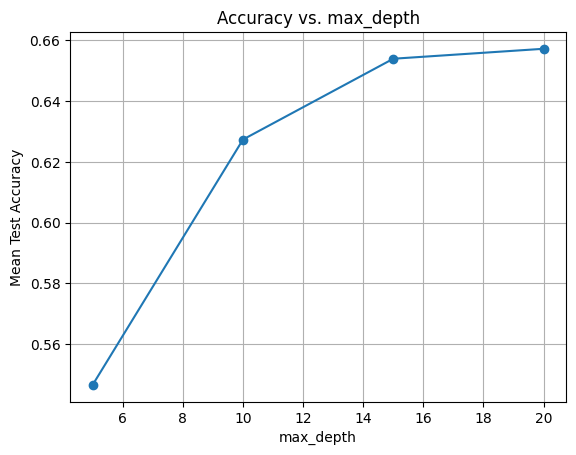

In [ ]:
# Install necessary libraries
!pip install wget

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import wget

# Download the datasets
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

wget.download(url_red, 'winequality-red.csv')
wget.download(url_white, 'winequality-white.csv')

# Load the datasets
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add a type column to differentiate between red and white
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine the datasets
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Preprocess the data
# Encode 'type' as a binary variable
wine_data['type'] = wine_data['type'].map({'red': 0, 'white': 1})

# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce dimensionality with PCA
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model development
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [5, 10, 15, 20, None]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy vs. max_depth
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

plt.plot(param_grid['max_depth'], mean_test_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. max_depth')
plt.grid(True)
plt.show()
